# **Linear Regression Assignment: Exploring Key Parameters and Model Evaluation**

# **Task 1: Dataset Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Task 2: Data Visualization**

<ipython-input-8-318ab9e5f49c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


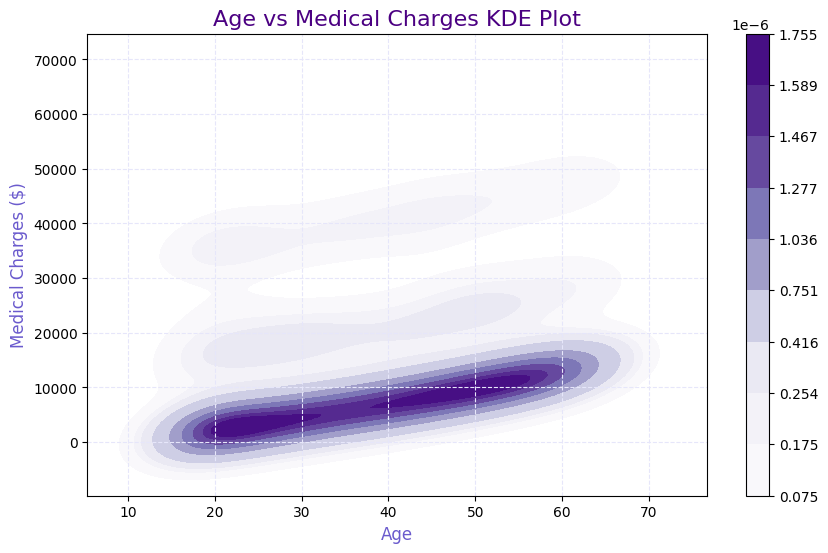

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="age",
    y="charges",
    cmap="Purples",
    shade=True,
    cbar=True
)

plt.title("Age vs Medical Charges KDE Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

<ipython-input-9-c6f085f7be72>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")


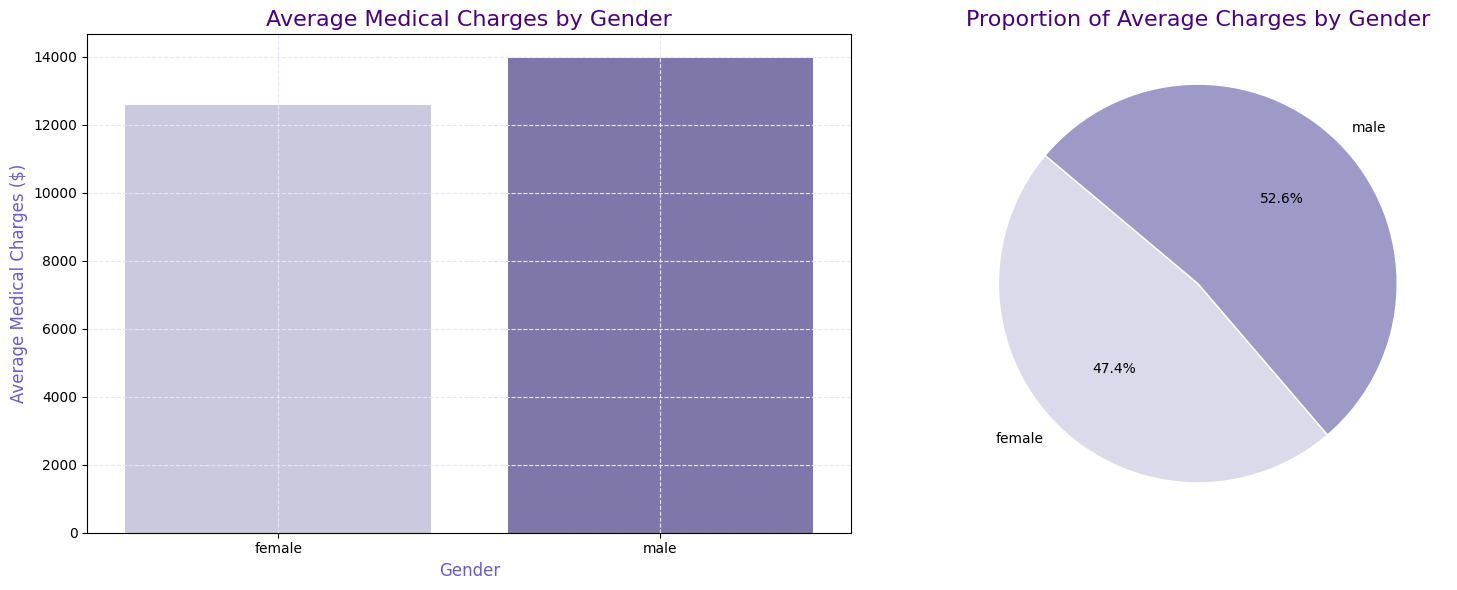

In [ ]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 3)
# Sütun grafiği
sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(
    average_charges_by_sex['charges'],
    labels=average_charges_by_sex['sex'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


<ipython-input-10-ed7646835a31>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


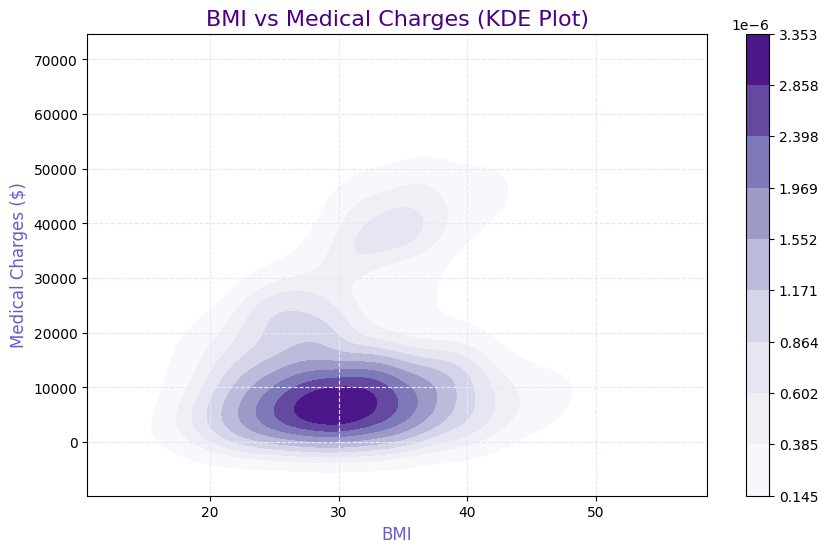

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="bmi",
    y="charges",
    cmap="Purples",
    shade=True,
    cbar=True
)
plt.title("BMI vs Medical Charges (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

<ipython-input-11-4bab066c3c19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")


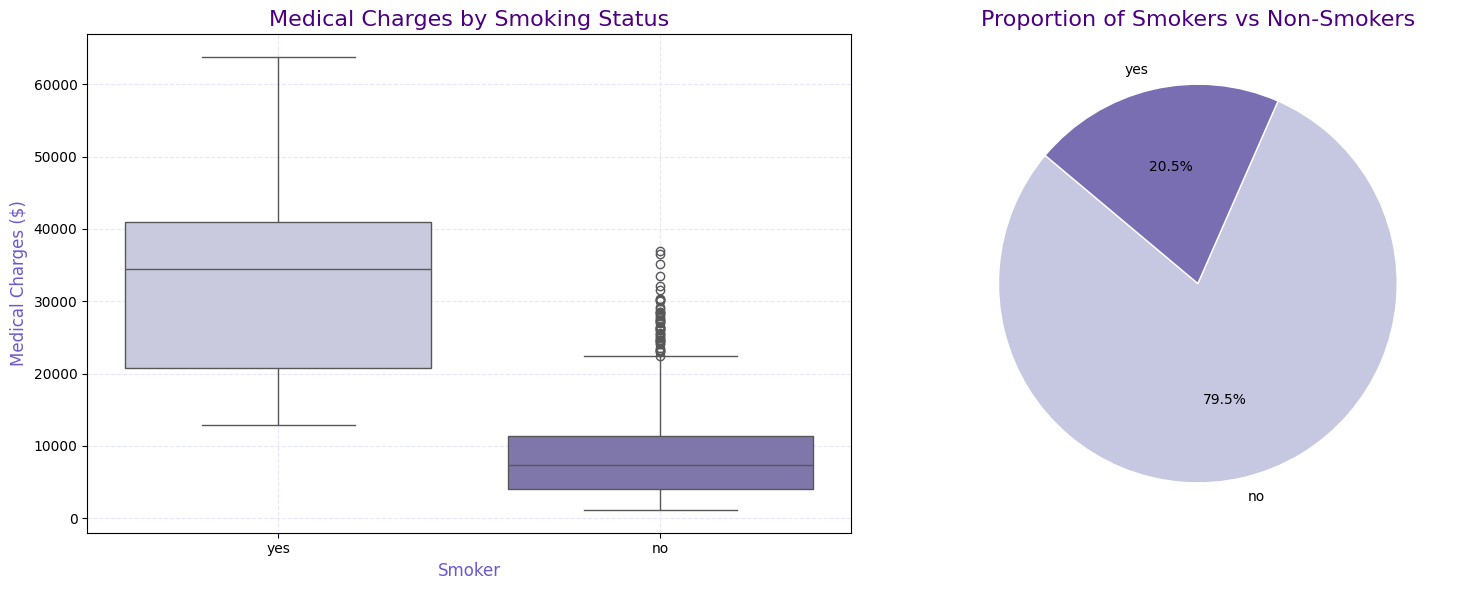

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 2)

sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")
axes[0].set_title("Medical Charges by Smoking Status", fontsize=16, color='indigo')
axes[0].set_xlabel("Smoker", fontsize=12, color='slateblue')
axes[0].set_ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

smoker_counts = df['smoker'].value_counts()
axes[1].pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Smokers vs Non-Smokers", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

<ipython-input-12-50a34db7f990>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")


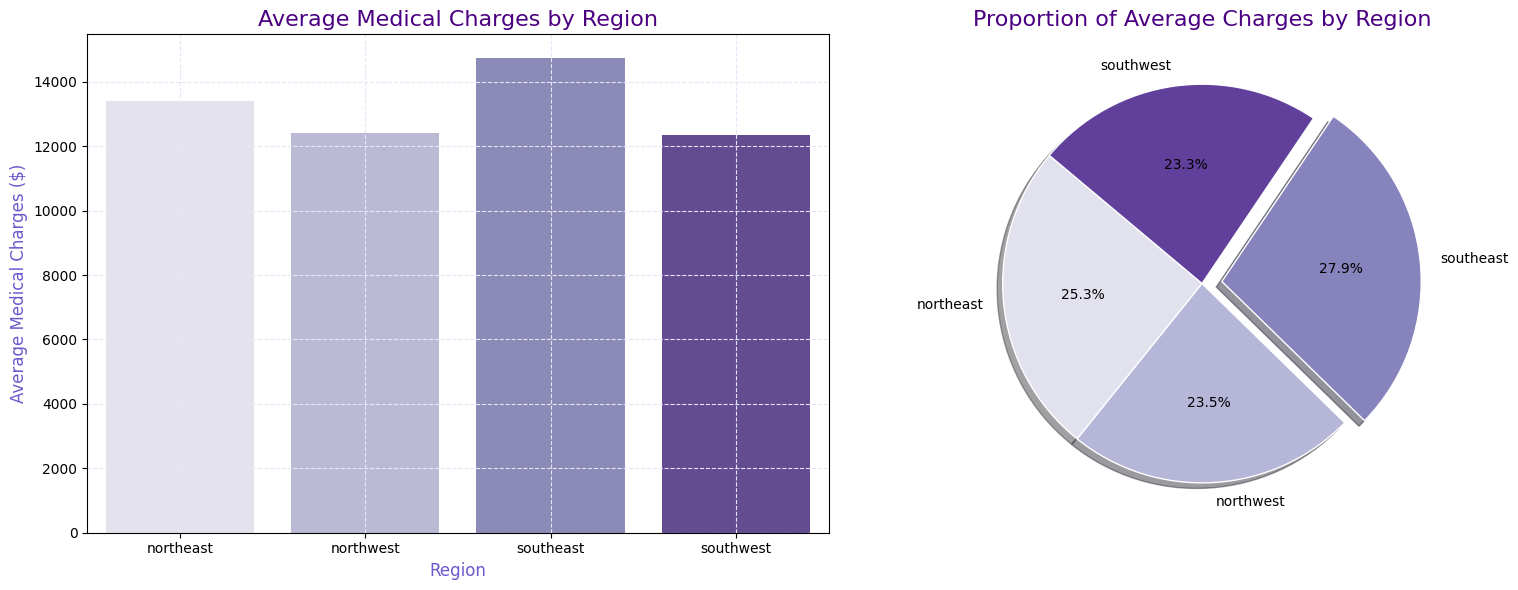

In [ ]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_region))


sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Region", fontsize=16, color='indigo')
axes[0].set_xlabel("Region", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_region['charges']
regions = average_charges_by_region['region']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=regions,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Region", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

<ipython-input-13-b3e457ec49bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")


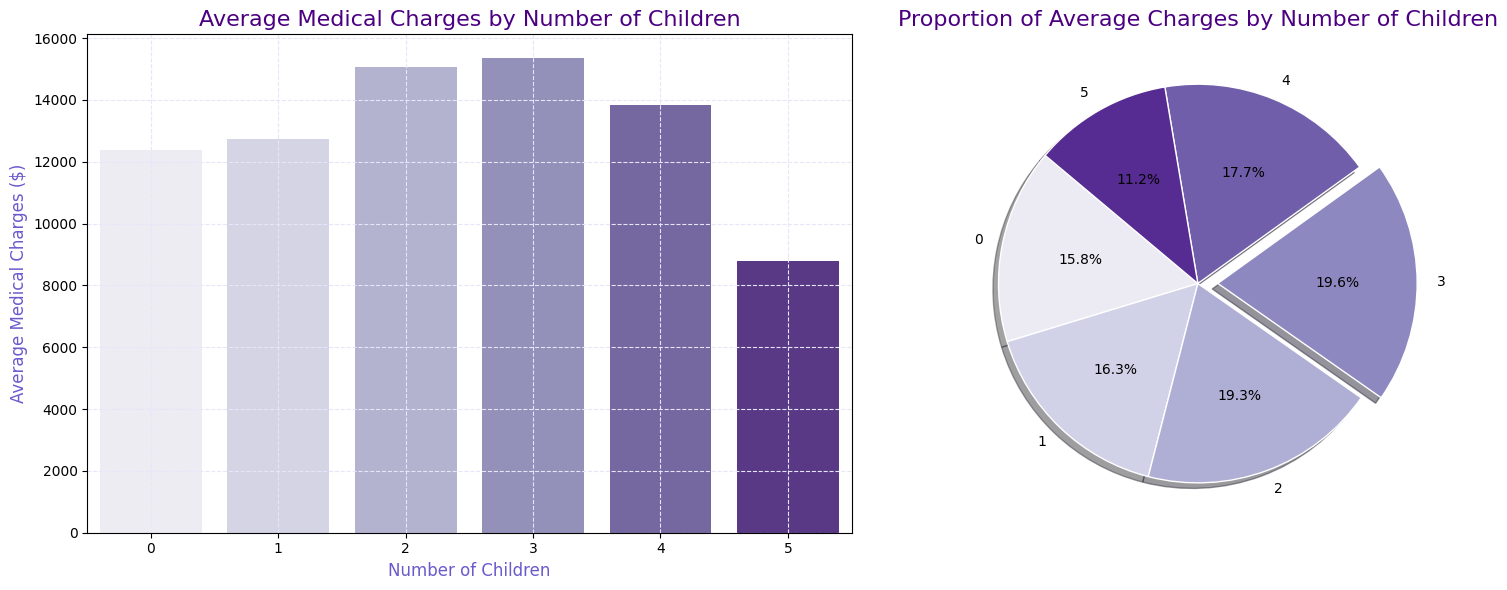

In [ ]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_children))


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=children,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


<ipython-input-14-6e5da9b640b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
<ipython-input-14-6e5da9b640b1>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
<ipython-input-14-6e5da9b640b1>:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


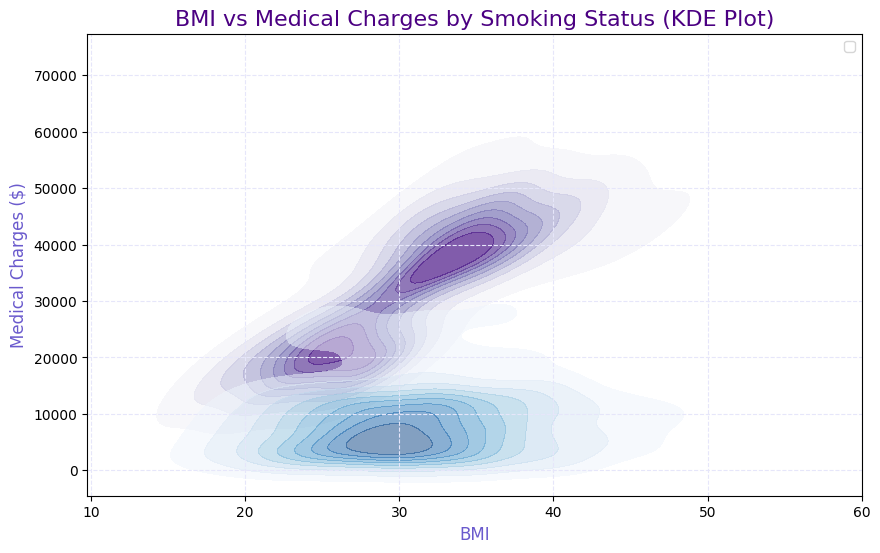

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df[df['smoker'] == 'yes'],
    x="bmi",
    y="charges",
    cmap="Purples",
    shade=True,
    alpha=0.7,
    label="Smoker",
    linewidth=2
)

sns.kdeplot(
    data=df[df['smoker'] == 'no'],
    x="bmi",
    y="charges",
    cmap="Blues",
    shade=True,
    alpha=0.5,
    label="Non-Smoker",
    linewidth=2
)

plt.title("BMI vs Medical Charges by Smoking Status (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend()
plt.show()

# **Task 3: Linear Regression Implementation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data preprocessing: encoding categorical variables
categorical_columns = ['sex', 'smoker', 'region']
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

In [ ]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

In [ ]:
# Apply encoding transformation
X = encoder.fit_transform(X)

In [ ]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract parameters
slope = model.coef_
intercept = model.intercept_

print("Linear Regression Model Parameters:")
print(f"Slope (m): {slope}")
print(f"Intercept (c): {intercept}")

Linear Regression Model Parameters:
Slope (m): [-1.85916916e+01  2.36511289e+04 -3.70677326e+02 -6.57864297e+02
 -8.09799354e+02  2.56975706e+02  3.37092552e+02  4.25278784e+02]
Intercept (c): -11931.219050326445


## **Task 4: Coefficient of Determination (R²)**

In [ ]:
# Evaluate the model (optional)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training R²: {train_score}")
print(f"Test R²: {test_score}")

Training R²: 0.7417255854683333
Test R²: 0.7835929767120722


# **Task 5: Predictions and Visualization**

In [ ]:
# Predict Y values (charges) for X values in the test set
y_pred = model.predict(X_test)


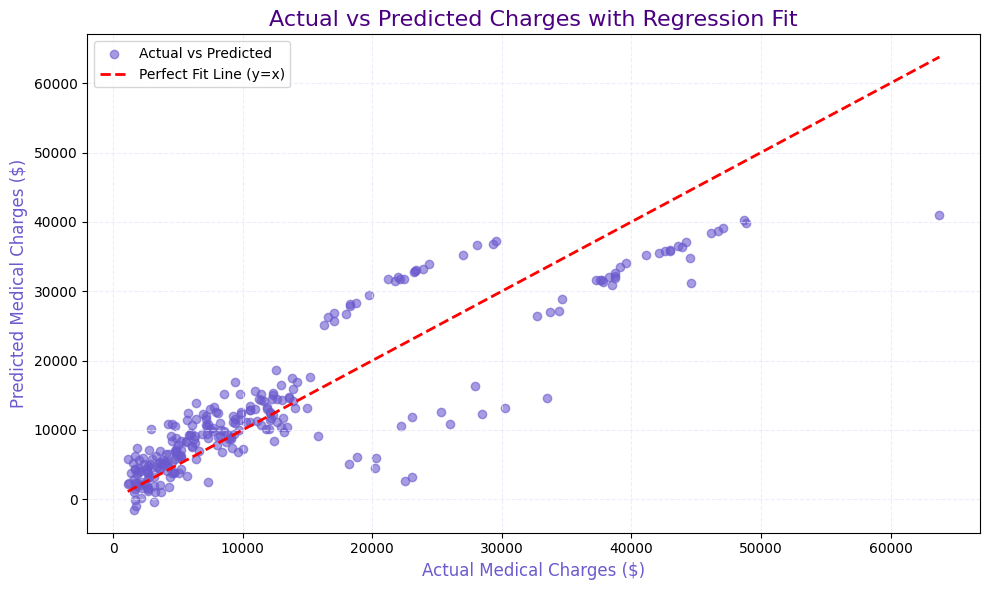

In [ ]:

# Scatter plot of original data (X_test vs y_test) with the regression line
import matplotlib.pyplot as plt

# Creating a figure
plt.figure(figsize=(10, 6))

# Scatter plot of original data
plt.scatter(y_test, y_pred, alpha=0.6, color='slateblue', label="Actual vs Predicted")

# Overlay: Perfect fit line (diagonal line where predictions perfectly match actual values)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    lw=2,
    label='Perfect Fit Line (y=x)'
)

# Adding titles and labels
plt.title("Actual vs Predicted Charges with Regression Fit", fontsize=16, color='indigo')
plt.xlabel("Actual Medical Charges ($)", fontsize=12, color='slateblue')
plt.ylabel("Predicted Medical Charges ($)", fontsize=12, color='slateblue')

# Adding a legend
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7, color='lavender')

# Show plot
plt.tight_layout()
plt.show()

# **Task 6: Residual Analysis**

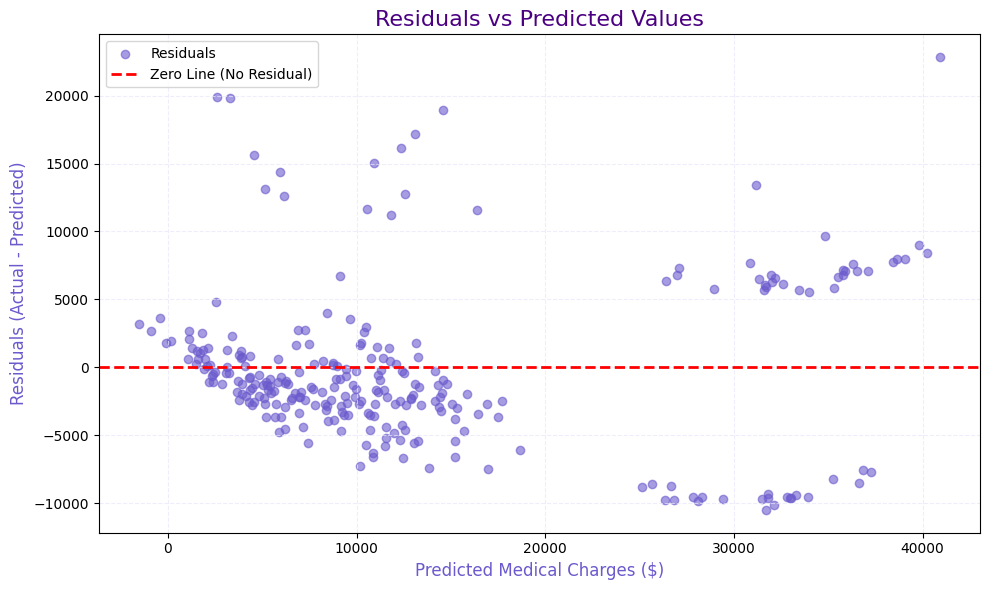

In [ ]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
plt.scatter(y_pred, residuals, alpha=0.6, color='slateblue', label='Residuals')

# Add a horizontal line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line (No Residual)')

# Titles and labels
plt.title("Residuals vs Predicted Values", fontsize=16, color='indigo')
plt.xlabel("Predicted Medical Charges ($)", fontsize=12, color='slateblue')
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12, color='slateblue')

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7, color='lavender')

# Show plot
plt.tight_layout()
plt.show()

# **Task 7: Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28


# **Linear Regression Assignment: Gradient Descent**

# **1. Dataset Preparation**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
X

array([[ 0.  ,  1.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  0.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
# Feature Scaling (Normalization)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
# Add bias (intercept) term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])  # One theta per feature + intercept
epochs = 1000

# **3. Cost Function**

In [ ]:
# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# **4. Gradient Descent**

In [ ]:
# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y

        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

Learning Rate: 0.001
Final Cost: 38189883.90916259
Optimized Parameters (Theta): [8438.79360172  251.60371136 5952.27631436 -122.76084723  209.30634656
 -185.77423915 2193.57075724 1362.74036523  461.55126178]

Learning Rate: 0.01
Final Cost: 18638952.959753767
Optimized Parameters (Theta): [ 1.33455136e+04 -8.70529765e+00  9.55789194e+03 -1.43936208e+02
 -2.74066666e+02 -3.34265195e+02  3.61488185e+03  2.03241312e+03
  5.16980755e+02]

Learning Rate: 0.1
Final Cost: 18638840.851009335
Optimized Parameters (Theta): [ 1.33460897e+04 -9.29310107e+00  9.55848141e+03 -1.58140981e+02
 -2.90157047e+02 -3.49110678e+02  3.61497541e+03  2.03622812e+03
  5.16890247e+02]

Learning Rate: 0.5
Final Cost: 18638840.851009335
Optimized Parameters (Theta): [ 1.33460897e+04 -9.29310107e+00  9.55848141e+03 -1.58140981e+02
 -2.90157047e+02 -3.49110678e+02  3.61497541e+03  2.03622812e+03
  5.16890247e+02]



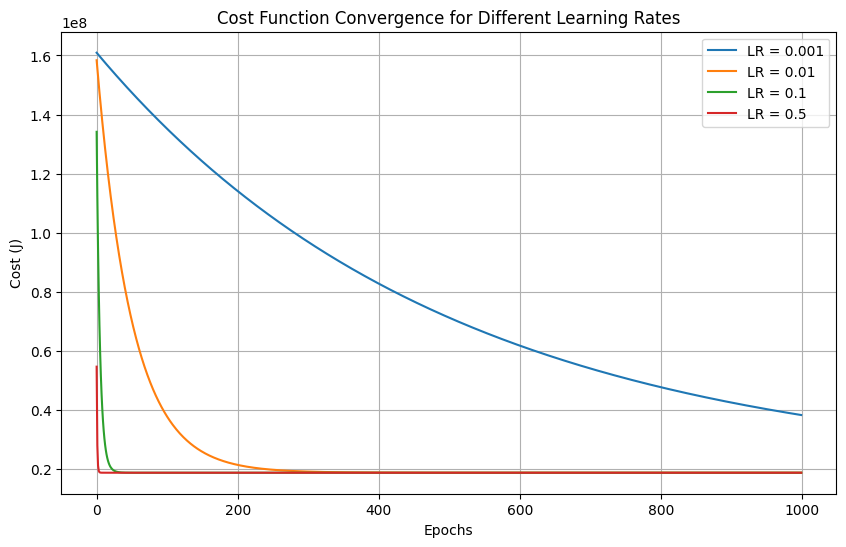

In [ ]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
cost_histories = {}

for lr in learning_rates:
    theta = np.zeros(X_train.shape[1])  # Reset theta for each experiment
    theta, cost_history = gradient_descent(X_train, y_train, theta, lr, epochs)
    cost_histories[lr] = cost_history
    print(f"Learning Rate: {lr}")
    print("Final Cost:", cost_history[-1])
    print("Optimized Parameters (Theta):", theta)
    print()

# Plot cost function convergence for each learning rate
plt.figure(figsize=(10, 6))
for lr, cost_history in cost_histories.items():
    plt.plot(range(epochs), cost_history, label=f"LR = {lr}")

plt.title("Cost Function Convergence for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Cost (J)")
plt.legend()
plt.grid(True)
plt.show()

# **5. Model Prediction and Visualization**

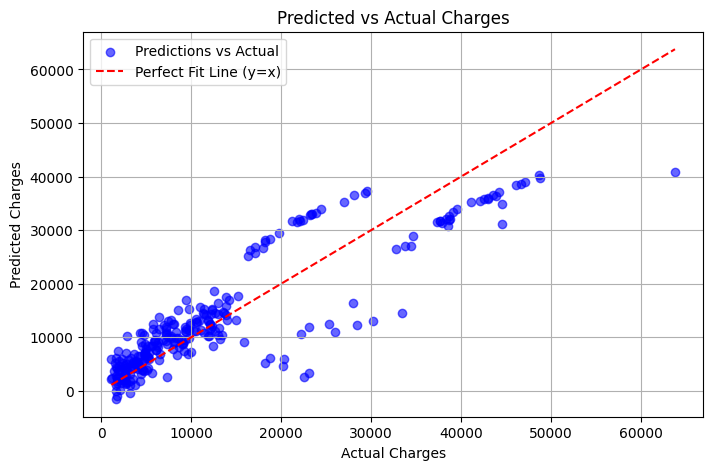

In [ ]:
# Make predictions on test set
y_pred = X_test.dot(theta)

# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions vs Actual")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Fit Line (y=x)"
)
plt.title("Predicted vs Actual Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

# **6. Model Evaluation**

In [ ]:
# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Coefficient of Determination (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
Coefficient of Determination (R²): 0.78
